In [2]:
# Merging together similar features ie. to mitigate the curse
# of dimensionality
# -> This approach can be implemented by clustering in the feature 
# direction, in other words clustering the transposed data

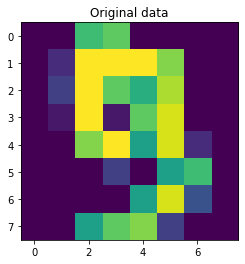

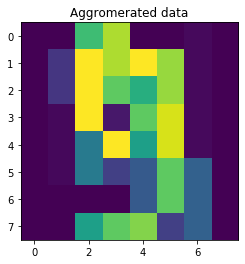

In [19]:
from sklearn import cluster, datasets
import numpy as np
from sklearn.feature_extraction.image import grid_to_graph
import matplotlib.pyplot as plt

digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)
agglo.fit(X) 

X_reduced = agglo.transform(X)

X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)


# plt.figure()
for img in images[1:10]:
    plt.title('Original data')
    plt.imshow(img)
    
plt.figure()
for img in images_approx[1:10]:
    plt.title('Aggromerated data')
    plt.imshow(img)
    
plt.show()